In [16]:
import pandas as pd
data = pd.read_csv('data.csv')
data

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,...,day9,hour9,minute9,second9,year10,month10,day10,hour10,minute10,second10
0,1,718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,10.0,25.0,25.0,2014.0,2.0,20.0,10.0,17.0,55.0
1,2,890,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,...,22.0,11.0,20.0,15.0,2014.0,2.0,22.0,11.0,20.0,16.0
2,3,14769,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,...,16.0,16.0,40.0,22.0,2013.0,12.0,16.0,16.0,40.0,24.0
3,4,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,...,28.0,10.0,56.0,12.0,2014.0,3.0,28.0,10.0,56.0,42.0
4,5,22,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,...,28.0,10.0,57.0,6.0,2014.0,2.0,28.0,10.0,57.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,253557,3474,3474.0,141.0,2428.0,106.0,2428.0,2428.0,2428.0,2428.0,...,25.0,10.0,27.0,52.0,2013.0,11.0,25.0,10.0,27.0,53.0
253557,253558,12727,12727.0,2215.0,38.0,2215.0,23.0,25444.0,2215.0,23.0,...,12.0,16.0,1.0,18.0,2013.0,3.0,12.0,16.0,1.0,18.0
253558,253559,2661,15004.0,5562.0,5562.0,5562.0,0.0,0.0,0.0,0.0,...,12.0,10.0,25.0,25.0,2013.0,9.0,12.0,10.0,17.0,55.0
253559,253560,812,676.0,814.0,22.0,39.0,812.0,814.0,570.0,22.0,...,19.0,15.0,20.0,24.0,2013.0,12.0,19.0,15.0,20.0,24.0


In [17]:
Id = data['session_id']
y = data['target']
X = data.drop(columns=['target', 'session_id']) 

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print("AUC-ROC:", roc_auc)

filtered_thresholds = [t for t in thresholds if not np.isinf(t)]

best_threshold = filtered_thresholds[0] 
best_accuracy = -1

for threshold in filtered_thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Accuracy at Best Threshold:", best_accuracy)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC-ROC: 0.8318458221718982
Best Threshold: 0.23391217821886784
Accuracy at Best Threshold: 0.9911001853580302


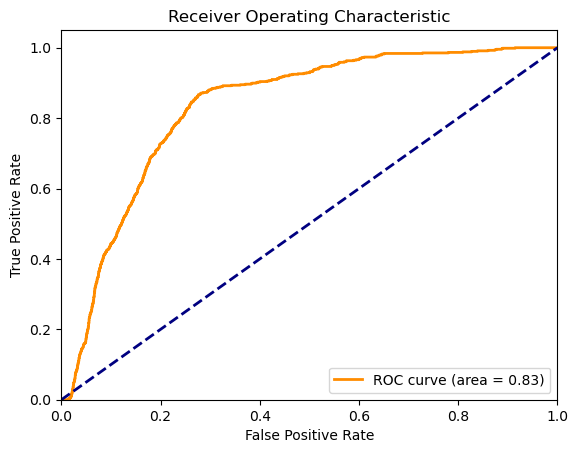

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

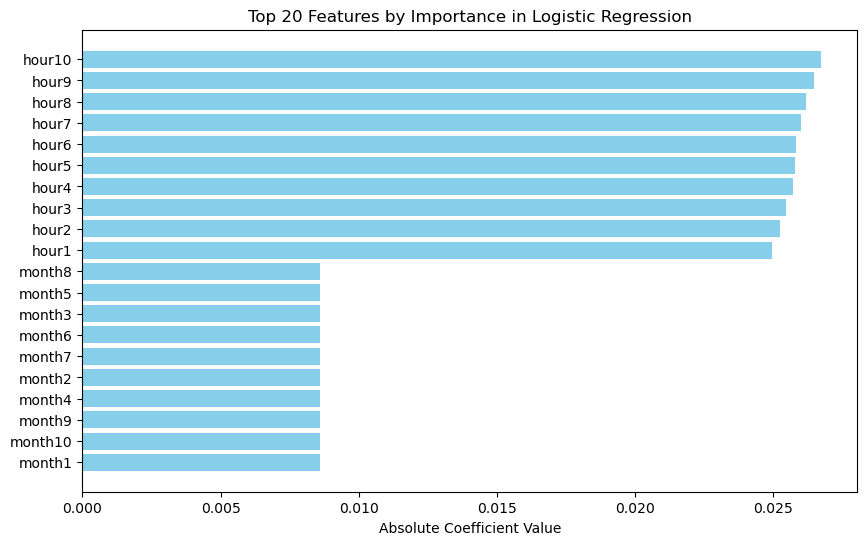

In [20]:
coefficients = model.coef_[0]
features = X_train.columns

importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)[::-1]

top_20_idx = sorted_idx[:20]
top_20_features = features[top_20_idx]
top_20_importance = importance[top_20_idx]

plt.figure(figsize=(10, 6))
plt.barh(top_20_features, top_20_importance, color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 20 Features by Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

#### After seeing the feature importance, we can observe that the sites don't contribute to anything. Even though the accuracy is good, it doesn't help much. I tried binary encoding and another encoding method, but neither worked. So, let's try something different.

In [39]:
Alice_log = pd.read_csv("Alice_log.csv")
Alice_log

,timestamp,site
0,2013-02-12 16:25:10,api.bing.com
1,2013-02-12 16:25:11,api.bing.com
2,2013-02-12 16:32:10,api.bing.com
3,2013-02-12 16:32:11,www.google.fr
4,2013-02-12 16:32:24,www.google.fr
...,...,...
22764,2014-04-15 18:06:49,h.live.com
22765,2014-04-15 18:07:48,storage.live.com
22766,2014-04-15 18:07:48,go.trouter.io
22767,2014-04-15 18:07:50,dub119.mail.live.com


In [40]:
Alice_log['site'].value_counts()

site
i1.ytimg.com                                              1382
s.youtube.com                                             1354
www.youtube.com                                           1307
www.facebook.com                                           897
www.google.fr                                              857
                                                          ... 
i1-js-14-3-01-10077-975406032-i.init.cedexis-radar.net       1
dtm.potterybarnkids.com                                      1
plg3.yumenetworks.com                                        1
id.impressiondesk.com                                        1
dfp.oxom.com                                                 1
Name: count, Length: 1053, dtype: int64

we can see here we have 1053 web site for Alice

In [41]:
data['site1'].value_counts()

site1
21       13874
23        9244
782       7769
29        5501
22        5434
         ...  
24629        1
1742         1
16301        1
9557         1
34942        1
Name: count, Length: 15765, dtype: int64

but in site 1 we have alot (15765)

In [42]:
import pickle

with open('site_dic.pkl', 'rb') as file:
    site_dict = pickle.load(file)

#### first let map each site to his id

In [43]:
Alice_log['site'] = Alice_log['site'].map(site_dict)
Alice_log['site']

0          270
1          270
2          270
3           21
4           21
         ...  
22764       14
22765       12
22766       11
22767    11241
22768       11
Name: site, Length: 22769, dtype: int64

#### now we will asign to each site the probability that alice will be on it

In [66]:
total = Alice_log.shape[0]
proba = Alice_log['site'].value_counts() / total
proba

site
77       0.060697
80       0.059467
76       0.057403
29       0.039396
21       0.037639
           ...   
27292    0.000044
2423     0.000044
27291    0.000044
1015     0.000044
18728    0.000044
Name: count, Length: 1053, dtype: float64

In [67]:
df = data.copy()

In [68]:
for i in range(1, 11):
    df = pd.merge(df, proba, left_on=f'site{i}', right_on='site', how='left')
    df.rename(columns={'count': f'proba_site_{i}'}, inplace=True)
    df = df.drop(columns=[f'site{i}'])
    df[f'proba_site_{i}'] = df[f'proba_site_{i}'].fillna(0)
df

,session_id,target,year1,month1,day1,hour1,minute1,second1,year2,month2,...,proba_site_1,proba_site_2,proba_site_3,proba_site_4,proba_site_5,proba_site_6,proba_site_7,proba_site_8,proba_site_9,proba_site_10
0,1,0,2014,2,20,10,2,45,2014.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0,2014,2,22,11,19,50,2014.0,2.0,...,0.000703,0.009443,0.002152,0.009443,0.006720,0.002152,0.002152,0.002152,0.002767,0.002679
2,3,0,2013,12,16,16,40,17,2013.0,12.0,...,0.000000,0.005314,0.000000,0.000000,0.012868,0.005314,0.000000,0.000000,0.000000,0.000000
3,4,0,2014,3,28,10,52,12,2014.0,3.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,0,2014,2,28,10,53,5,2014.0,2.0,...,0.022926,0.000703,0.000878,0.000483,0.000703,0.000483,0.000878,0.000703,0.000703,0.000483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,253557,0,2013,11,25,10,26,54,2013.0,11.0,...,0.000000,0.000000,0.000264,0.000000,0.003601,0.000000,0.000000,0.000000,0.000000,0.000659
253557,253558,0,2013,3,12,16,1,15,2013.0,3.0,...,0.000000,0.000000,0.000000,0.004304,0.000000,0.019193,0.000000,0.000000,0.019193,0.037639
253558,253559,0,2013,9,12,14,5,3,2013.0,9.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
253559,253560,0,2013,12,19,15,20,22,2013.0,12.0,...,0.000000,0.000264,0.000176,0.022926,0.005314,0.000000,0.000176,0.000000,0.022926,0.000000


### lets train the model

In [80]:
Id = df['session_id']
y = df['target']
X = df.drop(columns=['target', 'session_id'])

In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_probs = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print("AUC-ROC:", roc_auc)

filtered_thresholds = [t for t in thresholds if not np.isinf(t)]

best_threshold = filtered_thresholds[0]
best_accuracy = -1

for threshold in filtered_thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Accuracy at Best Threshold:", best_accuracy)

AUC-ROC: 0.8557354923710605
Best Threshold: 0.6936338092639358
Accuracy at Best Threshold: 0.9911001853580302


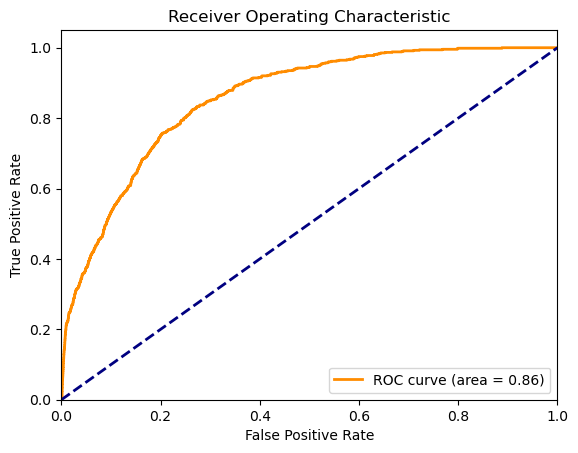

In [82]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

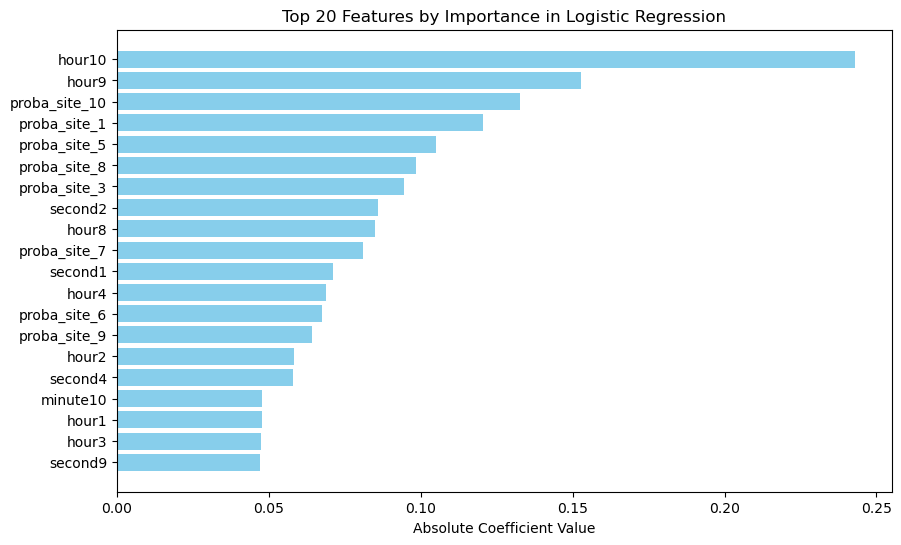

In [83]:
coefficients = model.coef_[0]
features = X_train.columns

importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)[::-1]

top_20_idx = sorted_idx[:20]
top_20_features = features[top_20_idx]
top_20_importance = importance[top_20_idx]

plt.figure(figsize=(10, 6))
plt.barh(top_20_features, top_20_importance, color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 20 Features by Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

#### Now we can see that the AUC-ROC has been improved, and the site features play a very good role in the prediction.

## XGBoost model

In [92]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

y_probs = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print("AUC-ROC:", roc_auc)

filtered_thresholds = [t for t in thresholds if not np.isinf(t)]

best_threshold = filtered_thresholds[0]
best_accuracy = -1

for threshold in filtered_thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Accuracy at Best Threshold:", best_accuracy)

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:55:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC-ROC: 0.9977447170907285
Best Threshold: 0.412056
Accuracy at Best Threshold: 0.9971210348499389


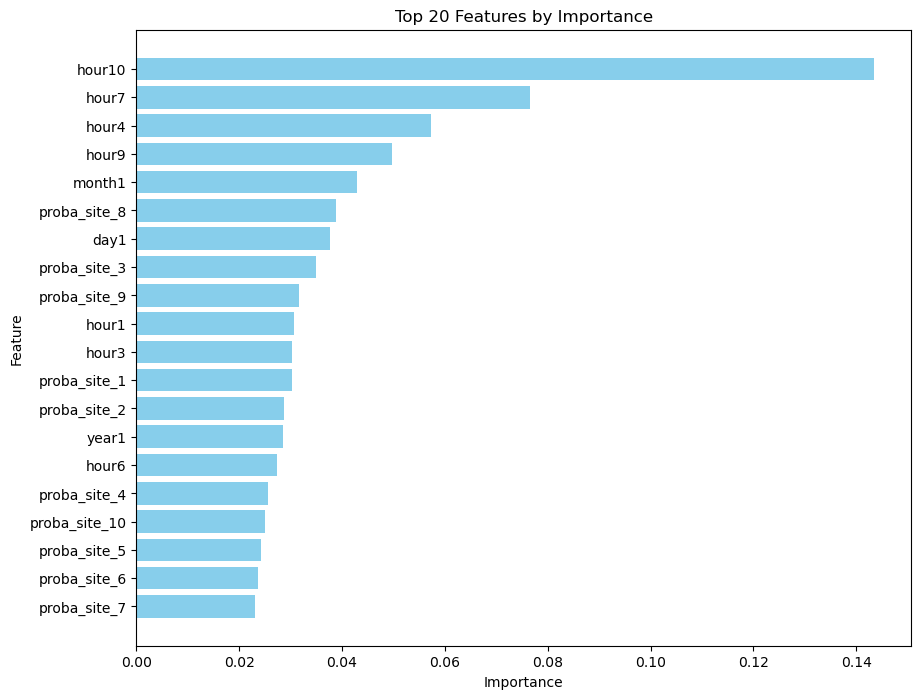

In [93]:
feature_importances = model.feature_importances_
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
top_20_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()
plt.show()

## finaly lets do the same for the test data and prep the submission file

In [84]:
test = pd.read_csv('test.csv')
test

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,...,day9,hour9,minute9,second9,year10,month10,day10,hour10,minute10,second10
0,1,29,35.0,22.0,321.0,23.0,2211.0,6730.0,21.0,44582.0,...,4.0,11.0,20.0,0.0,2014.0,10.0,4.0,11.0,20.0,0.0
1,2,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,...,3.0,11.0,1.0,30.0,2014.0,7.0,3.0,11.0,1.0,53.0
2,3,55,55.0,55.0,55.0,55.0,55.0,55.0,55.0,1445.0,...,5.0,15.0,56.0,33.0,2014.0,12.0,5.0,15.0,56.0,36.0
3,4,1023,1022.0,50.0,222.0,202.0,3374.0,50.0,48.0,48.0,...,4.0,10.0,3.0,23.0,2014.0,11.0,4.0,10.0,3.0,23.0
4,5,301,301.0,301.0,66.0,67.0,69.0,70.0,68.0,71.0,...,16.0,15.0,5.0,40.0,2014.0,5.0,16.0,15.0,5.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82792,82793,812,1039.0,676.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,10.0,40.0,50.0,2014.0,10.0,2.0,10.0,27.0,33.0
82793,82794,300,302.0,302.0,300.0,300.0,1222.0,302.0,1218.0,1221.0,...,26.0,14.0,17.0,19.0,2014.0,5.0,26.0,14.0,17.0,19.0
82794,82795,29,33.0,35.0,22.0,37.0,6779.0,30.0,21.0,23.0,...,2.0,11.0,22.0,4.0,2014.0,5.0,2.0,11.0,22.0,4.0
82795,82796,5828,23.0,21.0,804.0,21.0,3350.0,23.0,894.0,21.0,...,3.0,10.0,5.0,38.0,2014.0,5.0,3.0,10.0,5.0,38.0


In [85]:
for i in range(1, 11):
    test = pd.merge(test, proba, left_on=f'site{i}', right_on='site', how='left')
    test.rename(columns={'count': f'proba_site_{i}'}, inplace=True)
    test = test.drop(columns=[f'site{i}'])
    test[f'proba_site_{i}'] = test[f'proba_site_{i}'].fillna(0)
test

,session_id,year1,month1,day1,hour1,minute1,second1,year2,month2,day2,...,proba_site_1,proba_site_2,proba_site_3,proba_site_4,proba_site_5,proba_site_6,proba_site_7,proba_site_8,proba_site_9,proba_site_10
0,1,2014,10,4,11,19,53,2014.0,10.0,4.0,...,0.039396,0.016733,0.022926,0.000264,0.019193,0.000000,0.000000,0.037639,0.000000,0.000000
1,2,2014,7,3,11,0,28,2014.0,7.0,3.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,2014,12,5,15,55,12,2014.0,12.0,5.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,2014,11,4,10,3,19,2014.0,11.0,4.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,2014,5,16,15,5,31,2014.0,5.0,16.0,...,0.000000,0.000000,0.000000,0.000132,0.000088,0.000044,0.000088,0.000044,0.000088,0.002196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82792,82793,2014,10,2,18,20,9,2014.0,10.0,2.0,...,0.000000,0.000000,0.000264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
82793,82794,2014,5,26,14,16,40,2014.0,5.0,26.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
82794,82795,2014,5,2,11,21,56,2014.0,5.0,2.0,...,0.039396,0.012781,0.016733,0.022926,0.012868,0.000000,0.011946,0.037639,0.019193,0.000000
82795,82796,2014,5,3,10,5,25,2014.0,5.0,3.0,...,0.000000,0.019193,0.037639,0.000000,0.037639,0.000000,0.019193,0.000000,0.037639,0.000000


In [86]:
Id = test['session_id']
test_X = test.drop(columns=['session_id'])

In [94]:
test_X_scaled = scaler.transform(test_X)
test_y_probs = model.predict_proba(test_X_scaled)[:, 1]
submission = pd.DataFrame({'session_id': Id, 'target': test_y_probs})
submission

,session_id,target
0,1,7.678185e-06
1,2,7.464000e-08
2,3,1.795345e-08
3,4,3.350412e-07
4,5,5.864581e-07
...,...,...
82792,82793,4.806884e-06
82793,82794,6.213547e-09
82794,82795,4.824832e-07
82795,82796,2.049004e-07


In [95]:
submission.to_csv('submission.csv', index=False)